# 4. Simple regression

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf

for file_name in os.listdir('data'):
    if file_name.endswith('pkl'):
        df = pd.read_pickle( os.path.join('data',file_name) )
        exec("%s=df"%file_name.split(".")[0])
        

In [4]:
fuel.head(10)

,Model,Cylinders,Litres,Barrels,City,Highway,Cost,Carbon
20,Chevrolet Aveo,4.0,1.6,12.2,25.0,34.0,1012.0,6.6
21,Chevrolet Aveo 5,4.0,1.6,12.2,25.0,34.0,1012.0,6.6
27,Chevrolet Cobalt,4.0,2.2,12.7,24.0,33.0,1049.0,6.8
120,Chevrolet Colorado 2WD,4.0,2.9,17.1,18.0,24.0,1418.0,9.2
127,Chevrolet Colorado 2WD,5.0,3.7,18.0,17.0,23.0,1491.0,9.6
133,Chevrolet Colorado Cab Chassis inc 2WD,5.0,3.7,20.1,15.0,20.0,1667.0,10.8
121,Chevrolet Colorado Crew Cab 2WD,4.0,2.9,17.1,18.0,24.0,1418.0,9.2
128,Chevrolet Colorado Crew Cab 2WD,5.0,3.7,18.0,17.0,23.0,1491.0,9.6
95,Chevrolet HHR FWD,4.0,2.0,14.9,19.0,29.0,1233.0,8.0
96,Chevrolet HHR Panel FWD,4.0,2.0,14.9,19.0,29.0,1233.0,8.0


## 4.3. Regression and correlation
### Example 4.1 Car emissions

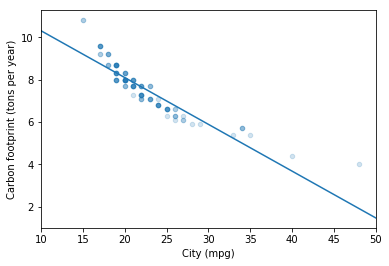

In [2]:
ax = fuel.plot.scatter(y='Carbon', x='City', alpha=0.2)
ax.set_xlabel('City (mpg)')
ax.set_ylabel('Carbon footprint (tons per year)')

fit = smf.ols(formula="Carbon ~ City", data=fuel).fit()
pd.Series(fit.predict(pd.Series(data=range(10,55,5),name='City').to_frame()), index=range(10,55,5)).plot()

plt.show()


In [3]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Carbon   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     619.5
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           1.07e-51
Time:                        16:07:59   Log-Likelihood:                -88.032
No. Observations:                 134   AIC:                             180.1
Df Residuals:                     132   BIC:                             185.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.5256      0.199     62.870      0.0

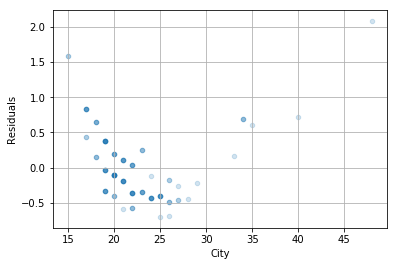

In [4]:
res = fit.resid.to_frame()
res.columns= ['Residuals']
res['City'] = fuel['City']
ax = res.plot.scatter(x='City', y=0, alpha=0.2)
ax.grid(True)
plt.show()

## 4.5 Forecasting with regression

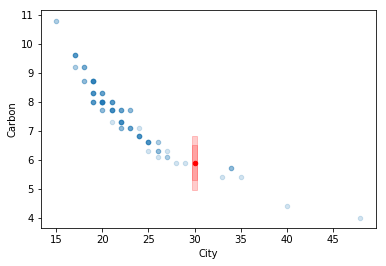

In [5]:
#from statsmodels.sandbox.regression.predstd import wls_prediction_std
#prstd, iv_l, iv_u = wls_prediction_std(fit)

ax = fuel.plot.scatter(y='Carbon', x='City', alpha=0.2)
ax.set_xlabel('City (mpg)')
ax.set_ylabel('Carbon footprint (tons per year)')

fit = smf.ols(formula="Carbon ~ City", data=fuel).fit()
fcast = pd.DataFrame({'Carbon':[fit.predict(pd.DataFrame({'City':[30]}))[0]], 'City':[30]})
fcast.plot.scatter(y='Carbon', x='City', ax=ax, color='red')

def forecast_interval(fit, y, x, x_mean, x_std):
    se = fit.mse_resid**0.5
    N = fit.nobs    
    value = (y-1.96*se*(1+1/N+(x-x_mean)**2./(N-1)/x_std**2)**0.5,
             y+1.96*se*(1+1/N+(x-x_mean)**2./(N-1)/x_std**2)**0.5,
             y-1.28*se*(1+1/N+(x-x_mean)**2./(N-1)/x_std**2)**0.5,
             y+1.28*se*(1+1/N+(x-x_mean)**2./(N-1)/x_std**2)**0.5,
             )
    return value

y = fit.params.Intercept+30*fit.params.City
fi_neg_95, fi_pos_95, fi_neg_80, fi_pos_80 = forecast_interval(fit, y, 30, fuel.City.mean(), fuel.City.std())

ax.fill_between([29.75,30.25], fi_neg_95, fi_pos_95 , color='red', alpha=0.2)
ax.fill_between([29.75,30.25], fi_neg_80, fi_pos_80 , color='red', alpha=0.2)

plt.show()


## 4.6 Statistical inference
### Confidence intervals

In [6]:
conf_int = fit.conf_int()
conf_int.columns=['2.5%','97.5%']
conf_int

,2.5%,97.5%
Intercept,12.131546,12.919748
City,-0.238531,-0.203409


## 4.7 Non-linear functional forms

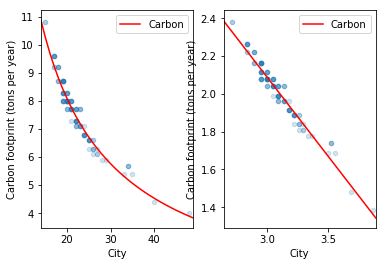

In [7]:
#from statsmodels.sandbox.regression.predstd import wls_prediction_std
#prstd, iv_l, iv_u = wls_prediction_std(fit)
_, ax = plt.subplots(1, 2)

fuel.plot.scatter(y='Carbon', x='City', ax=ax[0], alpha=0.2)

log_fuel = np.log(fuel[['City','Carbon']])
log_fuel.plot.scatter(y='Carbon', x='City', ax=ax[1], alpha=0.2)

ax[0].set_xlabel('City (mpg)')
ax[0].set_ylabel('Carbon footprint (tons per year)')

ax[1].set_xlabel('City (mpg)')
ax[1].set_ylabel('Carbon footprint (tons per year)')

fit2 = smf.ols(formula="np.log(Carbon) ~ np.log(City)", data=fuel).fit()

fcast = pd.DataFrame({'Carbon':np.exp(fit2.predict(pd.DataFrame({'City':range(14,50,1)}))), 'City':range(14,50,1)})
fcast.plot(y='Carbon', x='City', ax=ax[0], color='red')

fcast_log = pd.DataFrame({'Carbon':fit2.predict(pd.DataFrame({'City':range(14,50,1)})), 'City':np.log(range(14,50,1))})
fcast_log.plot(y='Carbon', x='City', ax=ax[1], color='red')

plt.show()


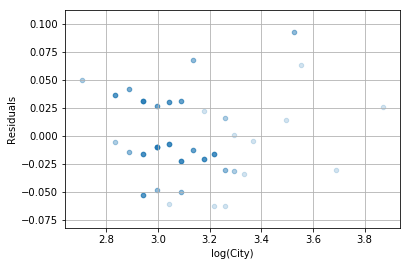

In [8]:
res = fit2.resid.to_frame()
res.columns= ['Residuals']
res['log(City)'] = log_fuel['City']
ax = res.plot.scatter(x='log(City)', y=0, alpha=0.2)
ax.grid(True)
plt.show()


## 4.8 Regression with time series data
### Example 4.3 US consumption expenditure

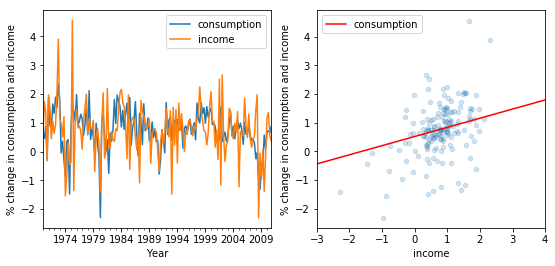

                            OLS Regression Results                            
Dep. Variable:                 Carbon   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     619.5
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           1.07e-51
Time:                        17:44:15   Log-Likelihood:                -88.032
No. Observations:                 134   AIC:                             180.1
Df Residuals:                     132   BIC:                             185.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.5256      0.199     62.870      0.0

In [14]:
fit3 = smf.ols(formula="consumption ~ income", data=usconsumption).fit()
_, ax = plt.subplots(1, 2, figsize=(9,4))
usconsumption.plot(ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('% change in consumption and income')

usconsumption.plot.scatter(x="consumption", y="income", ax=ax[1], alpha=0.2)
ax[1].set_xlabel('% change in income')
ax[1].set_ylabel('% change in consumption and income')

fcast = pd.DataFrame({'consumption':fit3.predict(pd.DataFrame({'income':range(-3,5,1)})), 'income':range(-3,5,1)})
fcast.plot(y='consumption', x='income', ax=ax[1], color='red')

plt.show()

print(fit.summary())

In [15]:
fcast

,consumption,income
0,-0.435365,-3
1,-0.116704,-2
2,0.201956,-1
3,0.520617,0
4,0.839277,1
5,1.157938,2
6,1.476598,3
7,1.795258,4


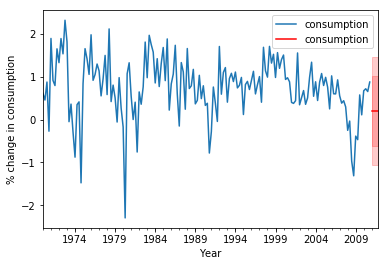

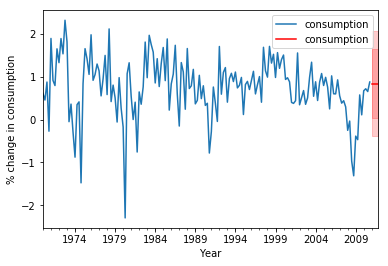

In [10]:
ax = usconsumption[['consumption']].plot()
ax.set_xlabel('Year')
ax.set_ylabel('% change in consumption')

fcast = pd.DataFrame({'consumption':fit3.predict(pd.DataFrame({'income':[-1, -1, -1, -1]})), 'income':[-1, -1, -1, -1]})
fcast.index = usconsumption.index[-4:]+4
fcast[['consumption']].plot(ax=ax, color='red')

y = fit3.params.Intercept-1*fit3.params.income
fi_neg_95, fi_pos_95, fi_neg_80, fi_pos_80 = forecast_interval(fit3, y, -1, usconsumption.consumption.mean(), usconsumption.consumption.std())

ax.fill_between(usconsumption.index[-4:]+4, fi_neg_95, fi_pos_95 , color='red', alpha=0.2)
ax.fill_between(usconsumption.index[-4:]+4, fi_neg_80, fi_pos_80 , color='red', alpha=0.2)

plt.show()

ax = usconsumption[['consumption']].plot()
ax.set_xlabel('Year')
ax.set_ylabel('% change in consumption')

fcast = pd.DataFrame({'consumption':fit3.predict(pd.DataFrame({'income':[1, 1, 1, 1]})), 'income':[1, 1, 1, 1]})
fcast.index = usconsumption.index[-4:]+4
fcast[['consumption']].plot(ax=ax, color='red')

y = fit3.params.Intercept+1*fit3.params.income
fi_neg_95, fi_pos_95, fi_neg_80, fi_pos_80 = forecast_interval(fit3, y, 1, usconsumption.consumption.mean(), usconsumption.consumption.std())

ax.fill_between(usconsumption.index[-4:]+4, fi_neg_95, fi_pos_95 , color='red', alpha=0.2)
ax.fill_between(usconsumption.index[-4:]+4, fi_neg_80, fi_pos_80 , color='red', alpha=0.2)

plt.show()

### Example 4.4 Linear trend

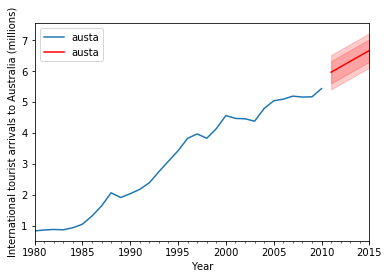

                            OLS Regression Results                            
Dep. Variable:                  austa   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1034.
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           3.11e-24
Time:                        16:08:01   Log-Likelihood:                -2.6696
No. Observations:                  31   AIC:                             9.339
Df Residuals:                      29   BIC:                             12.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5136      0.096      5.371      0.0

In [11]:
ax = austa[['austa']].plot()
austa['trend'] = range(0,len(austa))
ax.set_xlabel('Year')
ax.set_ylabel('International tourist arrivals to Australia (millions)')

fit4 = smf.ols(formula="austa ~ trend", data=austa).fit()

h=5
h_arr = np.arange(len(austa), len(austa)+h)
 
fcast = pd.DataFrame({'austa':fit4.predict(pd.DataFrame({'trend':h_arr})), 'trend':h_arr})
fcast.index = austa.index[-h:]+h
fcast[['austa']].plot(ax=ax, color='red')

y = fit4.params.Intercept+h_arr*fit4.params.trend
fi_neg_95, fi_pos_95, fi_neg_80, fi_pos_80 = forecast_interval(fit4, y, 1, austa.austa.mean(), austa.austa.std())

ax.fill_between(austa.index[-h:]+h, fi_neg_95, fi_pos_95 , color='red', alpha=0.2)
ax.fill_between(austa.index[-h:]+h, fi_neg_80, fi_pos_80 , color='red', alpha=0.2)

plt.show()

print(fit4.summary())